In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from lczero.backends import Weights

In [3]:
import torch

torch.cuda.is_available()

True

In [ ]:
# %pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# !gdown 1erxB3tULDURjpPhiPWVGr6X986Q8uE6U -O leela_models/leela_network.pb.gz

Downloading...
From: https://drive.google.com/uc?id=1erxB3tULDURjpPhiPWVGr6X986Q8uE6U
To: /app/src/leela_models/leela-network.pb.gz
100%|██████████████████████████████████████| 1.31M/1.31M [00:00<00:00, 3.01MB/s]


In [4]:
import os
from lczerolens.encodings import backends

In [5]:
CURRENT_DIR = os.getcwd()
LEELA_MODELS_DIR = os.path.join(CURRENT_DIR, 'leela_models')

In [6]:
leela_model_onnx = backends.convert_to_onnx(
    os.path.join(LEELA_MODELS_DIR, "leela_network.pb.gz"),
    os.path.join(LEELA_MODELS_DIR, "leela_network.onnx")
)
print(leela_model_onnx)


Format
~~~~~~
            Weights encoding: LINEAR16
                       Input: INPUT_CLASSICAL_112_PLANE
                     Network: NETWORK_SE_WITH_HEADFORMAT
                      Policy: POLICY_CONVOLUTION
                       Value: VALUE_WDL

Weights
~~~~~~~
                      Blocks: 6
                   SE blocks: 6
                     Filters: 64
                      Policy: Convolution
           Policy activation: ACTIVATION_DEFAULT
                       Value: WDL
                         MLH: Absent
Converting Leela network to the ONNX.

ONNX interface
~~~~~~~~~~~~~~
                   Data type: FLOAT
                Input planes: /input/planes
                  Output WDL: /output/wdl
               Output Policy: /output/policy
Done.



In [ ]:
# !gdown 1cxC8_8vw7akfPyc9cZxwaAbLG2Zl4XiT -O leela_models/lc0_10_4238.onnx

Downloading...
From: https://drive.google.com/uc?id=1cxC8_8vw7akfPyc9cZxwaAbLG2Zl4XiT
To: /app/src/leela_models/lc0_10_4238.onnx
100%|██████████████████████████████████████| 15.2M/15.2M [00:01<00:00, 9.15MB/s]


In [8]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'create_vlm.ipynb',
 'leela_models',
 'training_pipeline',
 'Untitled.ipynb']

In [ ]:
from lib.lczerolens.src.lczerolens import LczeroModel

model = LczeroModel.from_path(
    os.path.join(LEELA_MODELS_DIR, "lc0_10_4238.onnx")
)
model

ImportError: attempted relative import with no known parent package

In [12]:
from datasets import load_dataset
dataset = load_dataset("lczero-planning/boards")
dataset

DatasetDict({
    train: Dataset({
        features: ['gameid', 'moves', 'fen'],
        num_rows: 2231423
    })
    test: Dataset({
        features: ['gameid', 'moves', 'fen'],
        num_rows: 557856
    })
})

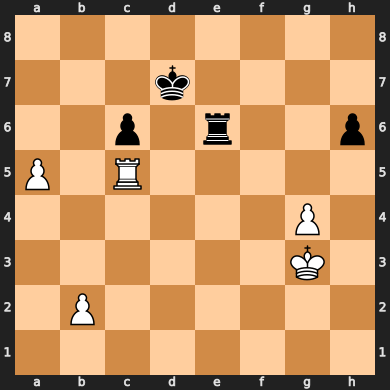

In [13]:
from chess import Board

board = Board(dataset['train'][1]['fen'])
board

In [14]:
from lib.lczerolens.src.lczerolens.lenses import ActivationLens
import chess

lens = ActivationLens()
board = chess.Board()
activations, output = lens.analyse(board, model=model, return_output=True)

In [32]:
from lczero.backends import Weights

Weights.input_format()

TypeError: unbound method Weights.input_format() needs an argument

In [21]:
model

GraphModule(
  (inputconv): Conv2d(112, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (inputconv/relu): ReLU()
  (block0/conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (block0/conv1/relu): ReLU()
  (block0/conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (block0/conv2/se/pooled): OnnxGlobalAveragePoolWithKnownInputShape()
  (initializers): Module()
  (block0/conv2/se/squeeze): OnnxSqueezeDynamicAxes()
  (block0/conv2/se/matmul1): OnnxMatMul()
  (block0/conv2/se/add1): OnnxBinaryMathOperation()
  (block0/conv2/se/relu): ReLU()
  (block0/conv2/se/matmul2): OnnxMatMul()
  (block0/conv2/se/add2): OnnxBinaryMathOperation()
  (block0/conv2/se/reshape): OnnxReshape()
  (block0/conv2/se/split): OnnxSplit13()
  (block0/conv2/se/sigmoid): Sigmoid()
  (block0/conv2/se/mul): OnnxBinaryMathOperation()
  (block0/conv2/se/add3): OnnxBinaryMathOperation()
  (block0/conv2/mixin): OnnxBinaryMathOperation()
  (block0/conv2/relu): ReL

In [18]:
[*activations.keys()]

['block0/conv1',
 'block0/conv2',
 'block0/conv2/se/matmul1',
 'block0/conv2/se/add1',
 'block0/conv2/se/matmul2',
 'block0/conv2/se/add2',
 'block0/conv2/se/add3',
 'block1/conv1',
 'block1/conv2',
 'block1/conv2/se/matmul1',
 'block1/conv2/se/add1',
 'block1/conv2/se/matmul2',
 'block1/conv2/se/add2',
 'block1/conv2/se/add3',
 'block2/conv1',
 'block2/conv2',
 'block2/conv2/se/matmul1',
 'block2/conv2/se/add1',
 'block2/conv2/se/matmul2',
 'block2/conv2/se/add2',
 'block2/conv2/se/add3',
 'block3/conv1',
 'block3/conv2',
 'block3/conv2/se/matmul1',
 'block3/conv2/se/add1',
 'block3/conv2/se/matmul2',
 'block3/conv2/se/add2',
 'block3/conv2/se/add3',
 'block4/conv1',
 'block4/conv2',
 'block4/conv2/se/matmul1',
 'block4/conv2/se/add1',
 'block4/conv2/se/matmul2',
 'block4/conv2/se/add2',
 'block4/conv2/se/add3',
 'block5/conv1',
 'block5/conv2',
 'block5/conv2/se/matmul1',
 'block5/conv2/se/add1',
 'block5/conv2/se/matmul2',
 'block5/conv2/se/add2',
 'block5/conv2/se/add3',
 'block6/c

In [ ]:
from lib.lczerolens.src.lczerolens.lenses import ActivationLens, ActivationBuffer
import chess
import einops

MODULE_NAME = 'block9/conv2/relu'
LENS = ActivationLens(MODULE_NAME)
N_BATCHES_IN_BUFFER = 15
COMPUTE_BATCH_SIZE = 1_000
TRAIN_BATCH_SIZE = 10_000

def collate_fn(batch):
    boards = []
    for x in batch:
        fen = x["fen"]
        moves = x["moves"]
        board = chess.Board(fen)
        for move in moves:
            board.push(chess.Move.from_uci(move))
        boards.append(board)
    return boards

def _compute_fn(batch, model, lens):
    boards = batch
    storage = lens.analyse(*boards, model=model)[0]
    if len(storage.keys()) != 1:
        raise NotImplementedError
    acts = next(iter(storage.values()))
    return einops.rearrange(acts, "b c h w -> (b h w) c")

def compute_fn(batch, model):
    return _compute_fn(batch, model, LENS)

In [46]:
train_buffer = ActivationBuffer(
    model,
    dataset["train"],
    compute_fn,
    N_BATCHES_IN_BUFFER,
    COMPUTE_BATCH_SIZE,
    TRAIN_BATCH_SIZE,
    dataloader_kwargs={"collate_fn": collate_fn},
)

val_buffer = ActivationBuffer(
    model,
    dataset["test"],
    compute_fn,
    N_BATCHES_IN_BUFFER,
    COMPUTE_BATCH_SIZE,
    TRAIN_BATCH_SIZE,
    dataloader_kwargs={"collate_fn": collate_fn},
)


In [47]:
acts = next(iter(train_buffer))
print("Out acts: ", acts.shape)
print("Stored acts: ", torch.cat(train_buffer._buffer, dim=0).shape)

Out acts:  torch.Size([10000, 128])
Stored acts:  torch.Size([960000, 128])
